# importing necessary libraries and dataset

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report
from sklearn.metrics import precision_score, recall_score, f1_score, accuracy_score
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split

In [2]:
dataset = pd.read_csv('diabetes.csv')

In [3]:
dataset.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


In [4]:
dataset.shape

(768, 9)

In [5]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 9 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Pregnancies               768 non-null    int64  
 1   Glucose                   768 non-null    int64  
 2   BloodPressure             768 non-null    int64  
 3   SkinThickness             768 non-null    int64  
 4   Insulin                   768 non-null    int64  
 5   BMI                       768 non-null    float64
 6   DiabetesPedigreeFunction  768 non-null    float64
 7   Age                       768 non-null    int64  
 8   Outcome                   768 non-null    int64  
dtypes: float64(2), int64(7)
memory usage: 54.1 KB


In [6]:
dataset.describe().T

,count,mean,std,min,25%,50%,75%,max
Pregnancies,768.0,3.845052,3.369578,0.000,1.00000,3.0000,6.00000,17.00
Glucose,768.0,120.894531,31.972618,0.000,99.00000,117.0000,140.25000,199.00
BloodPressure,768.0,69.105469,19.355807,0.000,62.00000,72.0000,80.00000,122.00
SkinThickness,768.0,20.536458,15.952218,0.000,0.00000,23.0000,32.00000,99.00
Insulin,768.0,79.799479,115.244002,0.000,0.00000,30.5000,127.25000,846.00
BMI,768.0,31.992578,7.884160,0.000,27.30000,32.0000,36.60000,67.10
DiabetesPedigreeFunction,768.0,0.471876,0.331329,0.078,0.24375,0.3725,0.62625,2.42
Age,768.0,33.240885,11.760232,21.000,24.00000,29.0000,41.00000,81.00
Outcome,768.0,0.348958,0.476951,0.000,0.00000,0.0000,1.00000,1.00


In [7]:
# check for null values
dataset.isnull().sum()

Pregnancies                 0
Glucose                     0
BloodPressure               0
SkinThickness               0
Insulin                     0
BMI                         0
DiabetesPedigreeFunction    0
Age                         0
Outcome                     0
dtype: int64

<Axes: xlabel='Outcome', ylabel='count'>

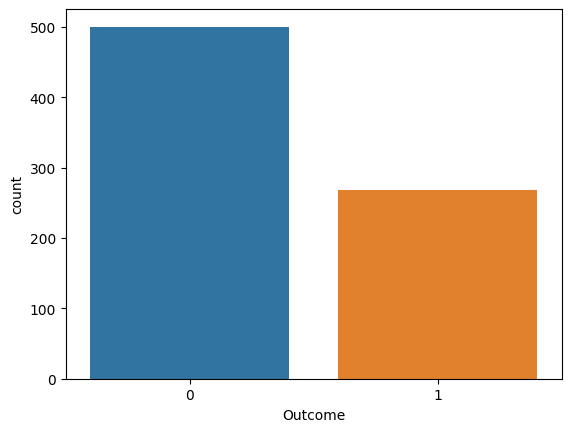

In [8]:
# Data Visulaization
sns.countplot(x='Outcome',data=dataset)

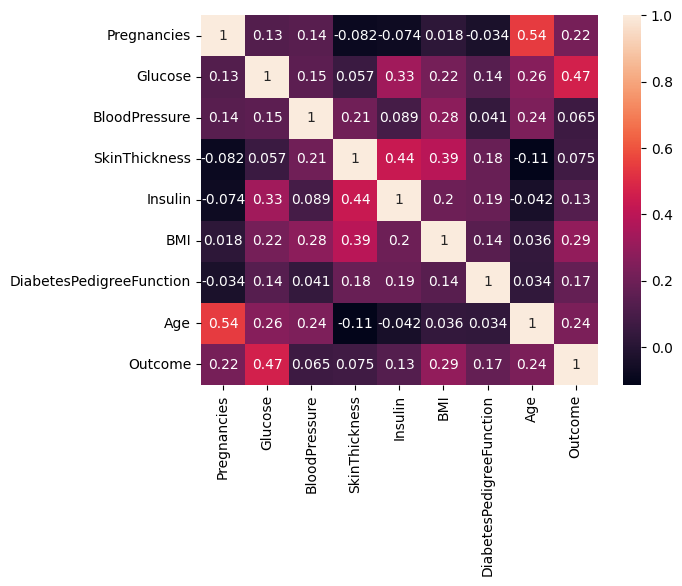

In [9]:
#heatmap of dataset
sns.heatmap(dataset.corr(),annot=True)
plt.show()

# Data Preprocessing

In [10]:
dataset_new = dataset

In [11]:
# replacing zero values with Nan
dataset_new[["Glucose","BloodPressure","SkinThickness","Insulin","BMI"]] = dataset_new[["Glucose","BloodPressure","SkinThickness","Insulin","BMI"]].replace(0,np.nan)

In [12]:
dataset_new.isnull().sum()

Pregnancies                   0
Glucose                       5
BloodPressure                35
SkinThickness               227
Insulin                     374
BMI                          11
DiabetesPedigreeFunction      0
Age                           0
Outcome                       0
dtype: int64

# Replacing NaN with mean values

In [13]:
dataset_new["Glucose"].fillna(dataset["Glucose"].mean(),inplace=True)
dataset_new["BloodPressure"].fillna(dataset["BloodPressure"].mean(),inplace=True)
dataset_new["SkinThickness"].fillna(dataset["SkinThickness"].mean(),inplace=True)
dataset_new["Insulin"].fillna(dataset["Insulin"].mean(),inplace=True)
dataset_new["BMI"].fillna(dataset["BMI"].mean(),inplace=True)

In [14]:
dataset_new.isnull().sum()

Pregnancies                 0
Glucose                     0
BloodPressure               0
SkinThickness               0
Insulin                     0
BMI                         0
DiabetesPedigreeFunction    0
Age                         0
Outcome                     0
dtype: int64

# Feature scaling using StandardScalar

# Scaling features - [Glucose,Bp,Insulin,BMI,Age]

In [15]:
x = dataset_new.iloc[:,[1,2,4,5,7]].values
y = dataset_new.iloc[:,8].values

In [17]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
scaler.fit(x)

StandardScaler()

In [18]:
standardized_data = scaler.transform(x)
standardized_data

array([[ 8.65108070e-01, -3.35182392e-02, -3.34507888e-16,
         1.66291742e-01,  1.42599540e+00],
       [-1.20616153e+00, -5.29859033e-01, -3.34507888e-16,
        -8.52531177e-01, -1.90671905e-01],
       [ 2.01581340e+00, -6.95305964e-01, -3.34507888e-16,
        -1.33283341e+00, -1.05584152e-01],
       ...,
       [-2.25789027e-02, -3.35182392e-02, -5.12538638e-01,
        -9.10749630e-01, -2.75759658e-01],
       [ 1.41807574e-01, -1.02619983e+00, -3.34507888e-16,
        -3.43119717e-01,  1.17073215e+00],
       [-9.43143171e-01, -1.98965170e-01, -3.34507888e-16,
        -2.99455878e-01, -8.71373930e-01]])

In [19]:
x = standardized_data
y = dataset_new['Outcome']

In [20]:
print(x)
print(y)

[[ 8.65108070e-01 -3.35182392e-02 -3.34507888e-16  1.66291742e-01
   1.42599540e+00]
 [-1.20616153e+00 -5.29859033e-01 -3.34507888e-16 -8.52531177e-01
  -1.90671905e-01]
 [ 2.01581340e+00 -6.95305964e-01 -3.34507888e-16 -1.33283341e+00
  -1.05584152e-01]
 ...
 [-2.25789027e-02 -3.35182392e-02 -5.12538638e-01 -9.10749630e-01
  -2.75759658e-01]
 [ 1.41807574e-01 -1.02619983e+00 -3.34507888e-16 -3.43119717e-01
   1.17073215e+00]
 [-9.43143171e-01 -1.98965170e-01 -3.34507888e-16 -2.99455878e-01
  -8.71373930e-01]]
0      1
1      0
2      1
3      0
4      1
      ..
763    0
764    0
765    0
766    1
767    0
Name: Outcome, Length: 768, dtype: int64


# Splitting X AND Y

In [21]:
x_train,x_test,y_train,y_test = train_test_split(x,y, test_size= 0.2 , random_state= 42, stratify = y)

In [22]:
# Printing shapes of x_train,x_test, y_train, y_test
print("x_train shape", x_train.shape)
print("x_test shape", x_test.shape)
print("y_train shape", y_train.shape)
print("y_test shape", y_test.shape)


x_train shape (614, 5)
x_test shape (154, 5)
y_train shape (614,)
y_test shape (154,)


# Data Modeling

In [23]:
# Logistic Regression Algorithm

from sklearn.linear_model import LogisticRegression
lr = LogisticRegression(random_state=42)
lr.fit(x_train,y_train)

LogisticRegression(random_state=42)

In [24]:
y_pred_lr = lr.predict(x_test)

# Classfication Report of model

In [25]:
print(classification_report(y_test,y_pred_lr))

              precision    recall  f1-score   support

           0       0.76      0.81      0.78       100
           1       0.60      0.52      0.55        54

    accuracy                           0.71       154
   macro avg       0.68      0.66      0.67       154
weighted avg       0.70      0.71      0.70       154



In [26]:
score_lr = round(accuracy_score(y_test,y_pred_lr)*100,2)
print("Accuracy score using logistic regression "+str(score_lr)+" %")

Accuracy score using logistic regression 70.78 %


# Confusion matrix

In [27]:
cm = confusion_matrix(y_test,y_pred_lr)
print(cm)

[[81 19]
 [26 28]]


# Heatmap of Confusion matrix

<Axes: >

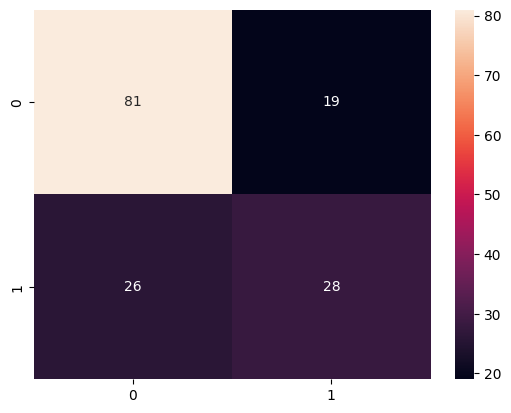

In [28]:
sns.heatmap(pd.DataFrame(cm), annot=True)

# Plotting a graph for n_neighbors

In [29]:
# import warnings filter
from warnings import simplefilter
# ignore all future warnings
simplefilter(action='ignore', category=FutureWarning)

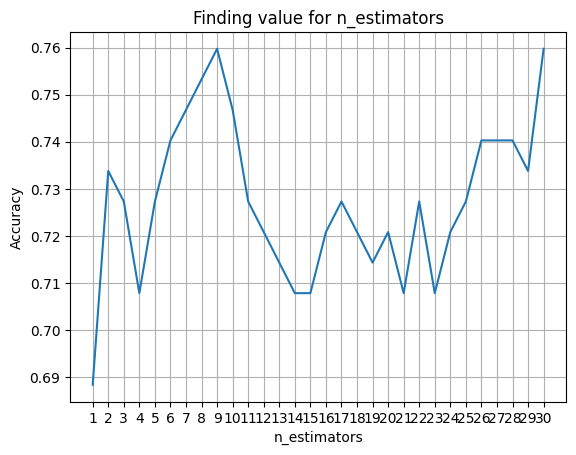

highest vlues :  0.7597402597402597


In [30]:
from sklearn import metrics
x_axis = list(range(1,31))
acc= pd.Series()
x = range(1,31)
for i in list(range(1,31)):
    knn_model = KNeighborsClassifier(n_neighbors = i)
    knn_model.fit(x_train,y_train)
    prediction = knn_model.predict(x_test)
    acc = acc.append(pd.Series(metrics.accuracy_score(prediction,y_test)))
plt.plot(x_axis,acc)
plt.xticks(x)
plt.title("Finding value for n_estimators")
plt.xlabel("n_estimators")
plt.ylabel("Accuracy")
plt.grid()
plt.show()
print("highest vlues : ",acc.values.max())

# K nearest neighbors Algorithm

In [31]:
from sklearn.neighbors import KNeighborsClassifier
knn = KNeighborsClassifier(n_neighbors = 24, metric = 'minkowski', p = 9)
knn.fit(x_train,y_train)

KNeighborsClassifier(n_neighbors=24, p=9)

# Predicting Using KNN

In [32]:
y_pred_knn = knn.predict(x_test)
score_knn = round(accuracy_score(y_test,y_pred_knn)*100,2)

In [33]:
print("Accuracy score using KNN "+str(score_knn)+" %")
print('Precision: %.3f' % precision_score(y_test,y_pred_knn))
print('Recall : %.3f' % recall_score(y_test,y_pred_knn))
print('F1 Score: %3f' % f1_score(y_test,y_pred_knn))

Accuracy score using KNN 74.03 %
Precision: 0.667
Recall : 0.519
F1 Score: 0.583333


# Classification report of KNN


In [34]:
print(classification_report(y_test,y_pred_knn))

              precision    recall  f1-score   support

           0       0.77      0.86      0.81       100
           1       0.67      0.52      0.58        54

    accuracy                           0.74       154
   macro avg       0.72      0.69      0.70       154
weighted avg       0.73      0.74      0.73       154



# Confusion matrix

In [35]:
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_test,y_pred_knn)
print(cm)

[[86 14]
 [26 28]]


<Axes: >

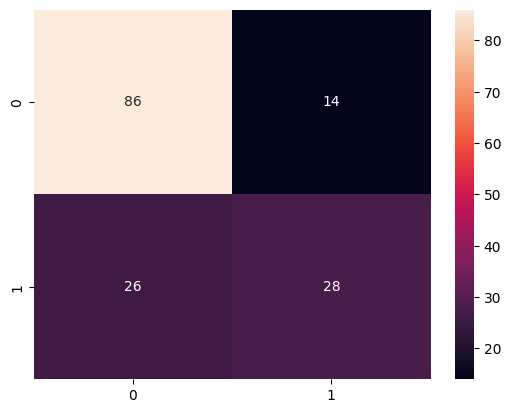

In [36]:
sns.heatmap(pd.DataFrame(cm),annot=True)

# Support Vector Classifier Algorithm

In [37]:
svc_linear = SVC(kernel = 'linear')
svc_linear.fit(x_train,y_train)
y_pred_svc_linear = svc_linear.predict(x_test)

In [38]:
score_svc_linear = round(accuracy_score(y_test,y_pred_svc_linear)*100,2)
print("Accuracy achieved using linear SVC is "+str(score_svc_linear)+" %")

Accuracy achieved using linear SVC is 72.08 %


In [39]:
print('Precision: %.3f' % precision_score(y_test,y_pred_svc_linear))
print('Recall : %.3f' % recall_score(y_test,y_pred_svc_linear))
print('F1 Score: %3f' % f1_score(y_test,y_pred_svc_linear))

Precision: 0.628
Recall : 0.500
F1 Score: 0.556701


In [40]:
print(classification_report(y_test,y_pred_svc_linear))

              precision    recall  f1-score   support

           0       0.76      0.84      0.80       100
           1       0.63      0.50      0.56        54

    accuracy                           0.72       154
   macro avg       0.69      0.67      0.68       154
weighted avg       0.71      0.72      0.71       154



# Building using SVC kernerl = Polynomial

In [41]:
svc_poly = SVC(kernel = 'poly')
svc_poly.fit(x_train,y_train)
y_pred_svc_poly = svc_poly.predict(x_test)

In [42]:
score_svc_poly = round(accuracy_score(y_test,y_pred_svc_poly)*100,2)
print("Accuracy achieved using linear SVC is "+str(score_svc_poly)+" %")

Accuracy achieved using linear SVC is 70.13 %


In [43]:
print('Precision: %.3f' % precision_score(y_test,y_pred_svc_poly))
print('Recall : %.3f' % recall_score(y_test,y_pred_svc_poly))
print('F1 Score: %3f' % f1_score(y_test,y_pred_svc_poly))

Precision: 0.682
Recall : 0.278
F1 Score: 0.394737


In [44]:
print(classification_report(y_test,y_pred_svc_poly))

              precision    recall  f1-score   support

           0       0.70      0.93      0.80       100
           1       0.68      0.28      0.39        54

    accuracy                           0.70       154
   macro avg       0.69      0.60      0.60       154
weighted avg       0.70      0.70      0.66       154



# Building using SVC kernel = gaussain

In [45]:
svc_gauss = SVC(kernel = 'rbf')
svc_gauss.fit(x_train,y_train)
y_pred_svc_gauss = svc_gauss.predict(x_test)

In [46]:
score_svc_gauss = round(accuracy_score(y_test,y_pred_svc_gauss)*100,2)
print("Accuracy achieved using linear SVC is "+str(score_svc_gauss)+" %")

Accuracy achieved using linear SVC is 74.68 %


In [47]:
print('Precision: %.3f' % precision_score(y_test,y_pred_svc_gauss))
print('Recall : %.3f' % recall_score(y_test,y_pred_svc_gauss))
print('F1 Score: %3f' % f1_score(y_test,y_pred_svc_gauss))

Precision: 0.667
Recall : 0.556
F1 Score: 0.606061


In [48]:
print(classification_report(y_test,y_pred_svc_gauss))

              precision    recall  f1-score   support

           0       0.78      0.85      0.81       100
           1       0.67      0.56      0.61        54

    accuracy                           0.75       154
   macro avg       0.72      0.70      0.71       154
weighted avg       0.74      0.75      0.74       154



# Building using SVC kernel = sigmoid

In [49]:
svc_sigm = SVC(kernel = 'sigmoid')
svc_sigm.fit(x_train,y_train)
y_pred_svc_sigm = svc_sigm.predict(x_test)

In [50]:
score_svc_sigm = round(accuracy_score(y_test,y_pred_svc_sigm)*100,2)
print("Accuracy achieved using linear SVC is "+str(score_svc_sigm)+" %")

Accuracy achieved using linear SVC is 65.58 %


In [51]:
print('Precision: %.3f' % precision_score(y_test,y_pred_svc_sigm))
print('Recall : %.3f' % recall_score(y_test,y_pred_svc_sigm))
print('F1 Score: %3f' % f1_score(y_test,y_pred_svc_sigm))

Precision: 0.509
Recall : 0.519
F1 Score: 0.513761


In [52]:
print(classification_report(y_test,y_pred_svc_sigm))

              precision    recall  f1-score   support

           0       0.74      0.73      0.73       100
           1       0.51      0.52      0.51        54

    accuracy                           0.66       154
   macro avg       0.62      0.62      0.62       154
weighted avg       0.66      0.66      0.66       154



# Creating a dictionary to compare accuracy of models

In [53]:
accuracy={'svc_poly':score_svc_poly,'svc_gauss':score_svc_gauss,'svc_sigmoid':score_svc_sigm,'svc_linear':score_svc_linear}

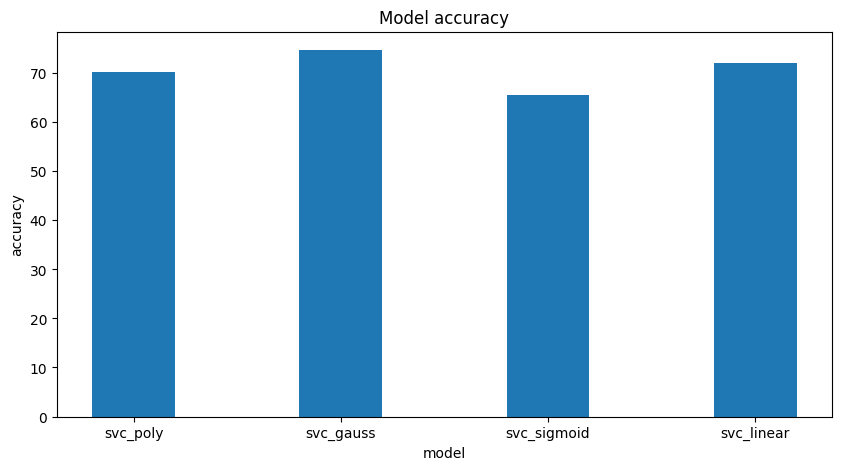

In [54]:
model = list(accuracy.keys())
values = list(accuracy.values())
fig = plt.figure(figsize = (10,5))
plt.bar(model, values, width = 0.4)
plt.xlabel("model")
plt.ylabel("accuracy")
plt.title("Model accuracy")
plt.show()

# Naive Bayes Algorithm

In [55]:
from sklearn.naive_bayes import GaussianNB
nb = GaussianNB()
nb.fit(x_train,y_train)

GaussianNB()

In [56]:
y_pred_nb = nb.predict(x_test)

In [57]:
print('Precision: %.3f' % precision_score(y_test,y_pred_nb))
print('Recall : %.3f' % recall_score(y_test,y_pred_nb))
print('F1 Score: %3f' % f1_score(y_test,y_pred_nb))

Precision: 0.571
Recall : 0.519
F1 Score: 0.543689


In [58]:
print(classification_report(y_test,y_pred_nb))

              precision    recall  f1-score   support

           0       0.75      0.79      0.77       100
           1       0.57      0.52      0.54        54

    accuracy                           0.69       154
   macro avg       0.66      0.65      0.66       154
weighted avg       0.69      0.69      0.69       154



In [59]:
score_nb = round(accuracy_score(y_test,y_pred_nb)*100,2)
print("Accuracy score using logistic regression "+str(score_nb)+" %")

Accuracy score using logistic regression 69.48 %


# Decision tree Algorithm

In [60]:
from sklearn.tree import DecisionTreeClassifier
dectree = DecisionTreeClassifier(criterion ='entropy',random_state = 42)
dectree.fit(x_train,y_train)

DecisionTreeClassifier(criterion='entropy', random_state=42)

In [61]:
y_pred_dectree = dectree.predict(x_test)

In [62]:
print('Precision: %.3f' % precision_score(y_test,y_pred_dectree))
print('Recall : %.3f' % recall_score(y_test,y_pred_dectree))
print('F1 Score: %3f' % f1_score(y_test,y_pred_dectree))

Precision: 0.588
Recall : 0.556
F1 Score: 0.571429


In [63]:
print(classification_report(y_test,y_pred_dectree))

              precision    recall  f1-score   support

           0       0.77      0.79      0.78       100
           1       0.59      0.56      0.57        54

    accuracy                           0.71       154
   macro avg       0.68      0.67      0.67       154
weighted avg       0.70      0.71      0.71       154



In [64]:
score_dectree = round(accuracy_score(y_test,y_pred_dectree)*100,2)
print("Accuracy score using logistic regression "+str(score_dectree)+" %")

Accuracy score using logistic regression 70.78 %


# Random Forest Algorithm

In [65]:
from sklearn.ensemble import RandomForestClassifier
ranfor = RandomForestClassifier(n_estimators = 11, criterion = 'entropy', random_state = 42)
ranfor.fit(x_train,y_train)

RandomForestClassifier(criterion='entropy', n_estimators=11, random_state=42)

In [66]:
y_pred_ranfor = ranfor.predict(x_test)
print('Precision: %.3f' % precision_score(y_test,y_pred_ranfor))
print('Recall : %.3f' % recall_score(y_test,y_pred_ranfor))
print('F1 Score: %3f' % f1_score(y_test,y_pred_ranfor))

Precision: 0.667
Recall : 0.593
F1 Score: 0.627451


In [67]:
print(classification_report(y_test,y_pred_ranfor))

              precision    recall  f1-score   support

           0       0.79      0.84      0.82       100
           1       0.67      0.59      0.63        54

    accuracy                           0.75       154
   macro avg       0.73      0.72      0.72       154
weighted avg       0.75      0.75      0.75       154



In [68]:
score_ranfor = round(accuracy_score(y_test,y_pred_ranfor)*100,2)
print("Accuracy score using logistic regression "+str(score_ranfor)+" %")

Accuracy score using logistic regression 75.32 %


# XGBoost Algorithm

In [69]:
import xgboost as xgb
xgb_classifier = xgb.XGBClassifier()
xgb_classifier.fit(x_train,y_train)
y_pred_xg = xgb_classifier.predict(x_test)

In [70]:
print('Precision: %.3f' % precision_score(y_test,y_pred_xg))
print('Recall : %.3f' % recall_score(y_test,y_pred_xg))
print('F1 Score: %3f' % f1_score(y_test,y_pred_xg))

Precision: 0.702
Recall : 0.611
F1 Score: 0.653465


In [71]:
print(accuracy_score(y_test,y_pred_xg))

0.7727272727272727


In [72]:
print(classification_report(y_test,y_pred_xg))

              precision    recall  f1-score   support

           0       0.80      0.86      0.83       100
           1       0.70      0.61      0.65        54

    accuracy                           0.77       154
   macro avg       0.75      0.74      0.74       154
weighted avg       0.77      0.77      0.77       154



In [73]:
score_xg = round(accuracy_score(y_test,y_pred_xg)*100,2)
print("Accuracy score using xg boost "+str(score_xg)+" %")

Accuracy score using xg boost 77.27 %


In [74]:
cm = confusion_matrix(y_test,y_pred_xg)
print(cm)

[[86 14]
 [21 33]]


<Axes: >

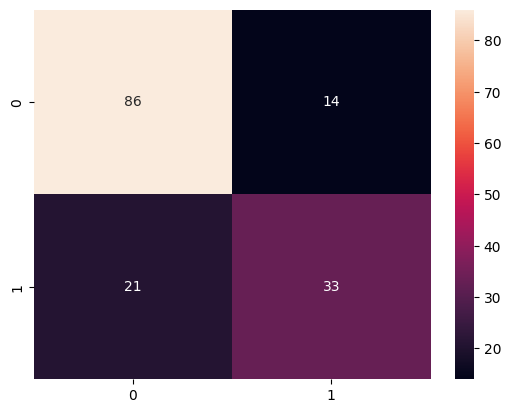

In [75]:
sns.heatmap(pd.DataFrame(cm),annot=True)

In [76]:
accuracy={'Linear regression': score_lr,
          'KNN': score_knn,
          'svc_poly':score_svc_poly,
          'svc_gauss':score_svc_gauss,
          'svc_sigmoid':score_svc_sigm,
          'svc_linear':score_svc_linear,
          'Naive Bayes ': score_nb,
          'Decision Tree': score_dectree,
          'XgBoost' : score_xg
         }


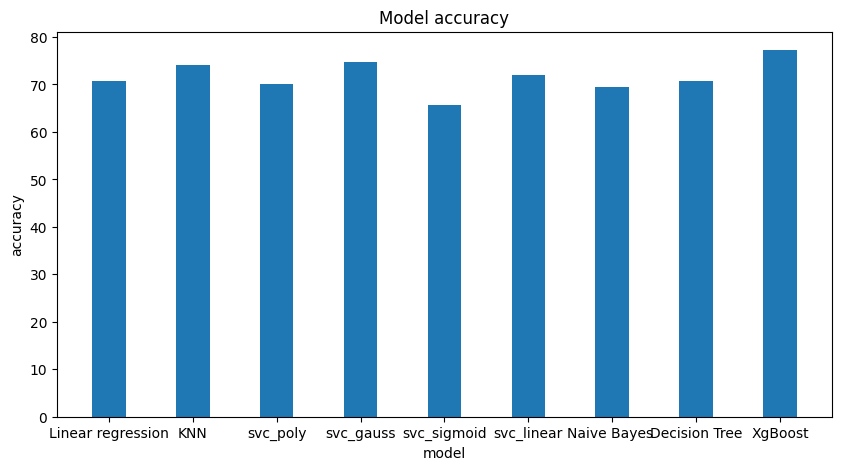

In [77]:
model = list(accuracy.keys())
values = list(accuracy.values())
fig = plt.figure(figsize = (10,5))
plt.bar(model, values, width = 0.4)
plt.xlabel("model")
plt.ylabel("accuracy")
plt.title("Model accuracy")
plt.show()

In [78]:
import pickle
filename = 'diabetes_trained_model.pkl'
pickle.dump(xgb_classifier,open(filename,'wb'))

In [79]:
x = dataset_new.loc[dataset_new['Outcome'] == 1]
x.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148.0,72.0,35.00000,155.548223,33.6,0.627,50,1
2,8,183.0,64.0,29.15342,155.548223,23.3,0.672,32,1
4,0,137.0,40.0,35.00000,168.000000,43.1,2.288,33,1
6,3,78.0,50.0,32.00000,88.000000,31.0,0.248,26,1
8,2,197.0,70.0,45.00000,543.000000,30.5,0.158,53,1


In [80]:
loaded_model = pickle.load(open('diabetes_trained_model.pkl','rb'))

In [81]:
input_data = (183,64,155,23,32)
#chaning the input data to numpy array
input_data_as_numpy_array = np.asarray(input_data)

#reshape the array as we are predicting for one instance
input_data_reshaped = input_data_as_numpy_array.reshape(1,-1)
std_data = scaler.transform(input_data_reshaped)
pred = loaded_model.predict(std_data)
print(pred)
if(pred[0] == 0):
    print("The user no need to worry")
else:
    print("The user need to consult doctor and take precautions")

[1]
The user need to consult doctor and take precautions


In [82]:
y = dataset_new.loc[dataset_new['Outcome'] == 0]
y.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
1,1,85.0,66.000000,29.00000,155.548223,26.6,0.351,31,0
3,1,89.0,66.000000,23.00000,94.000000,28.1,0.167,21,0
5,5,116.0,74.000000,29.15342,155.548223,25.6,0.201,30,0
7,10,115.0,72.405184,29.15342,155.548223,35.3,0.134,29,0
10,4,110.0,92.000000,29.15342,155.548223,37.6,0.191,30,0


In [83]:
input_data = (110,92,155.54,37.6,30)
#chaning the input data to numpy array
input_data_as_numpy_array = np.asarray(input_data)

#reshape the array as we are predicting for one instance
input_data_reshaped = input_data_as_numpy_array.reshape(1,-1)
std_data = scaler.transform(input_data_reshaped)

pred = loaded_model.predict(std_data)
print(pred)
if(pred[0] == 0):
    print("The user no need to worry")
else:
    print("The user need to consult doctor and take precautions")

[0]
The user no need to worry
